In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [ ]:
def gamma_format_convertion_iteration_to_simulation(iteration_gamma, gamma_for_simulation):
    # gamma_location = "/Users/weilu/Research/server_backup/jan_2019/optimization/gammas_dec30/cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
    # gamma_for_simulation = "/Users/weilu/Research/server_backup/jan_2019/optimization/iteration_gamma.dat"
    gamma = iteration_gamma
    gamma = -gamma  # caused by tradition.
    # convert gamma to gamma used by simulation
    with open(gamma_for_simulation, "w") as out:
        c = 0
        for i in range(20):
            for j in range(i, 20):
                out.write(f"{gamma[c]:<.5f} {gamma[c]:10.5f}\n")
                c += 1
        out.write("\n")
        for i in range(20):
            for j in range(i, 20):
                # protein, water
                out.write(f"{gamma[c]:<.5f} {gamma[c+210]:10.5f}\n")
                c += 1

In [35]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/back_up_gammas/"
A_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_A"
B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B"
B_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B_filtered"
P_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_P"
Gamma_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
Gamma_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
Lamb_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb"
Lamb_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)





In [57]:
pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
A_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_A"
B_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B"
B_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_B_filtered"
P_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_P"
Gamma_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma"
Gamma_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_gamma_filtered"
Lamb_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb"
Lamb_filtered_name = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})



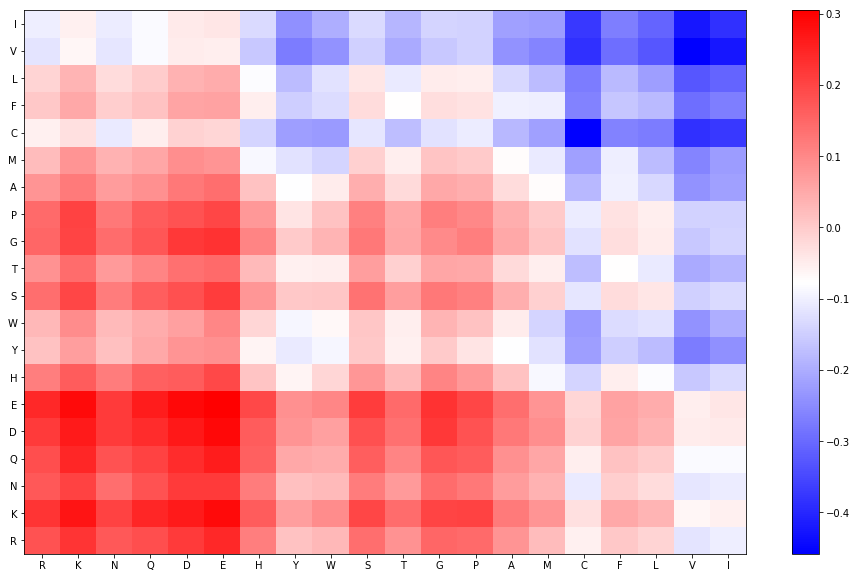

In [84]:
plot_contact_well(Gamma[210:420], inferBound=True)

In [87]:
gamma_for_simulation = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/iteration_gamma.dat"
gamma_format_convertion_iteration_to_simulation(Gamma, gamma_for_simulation)



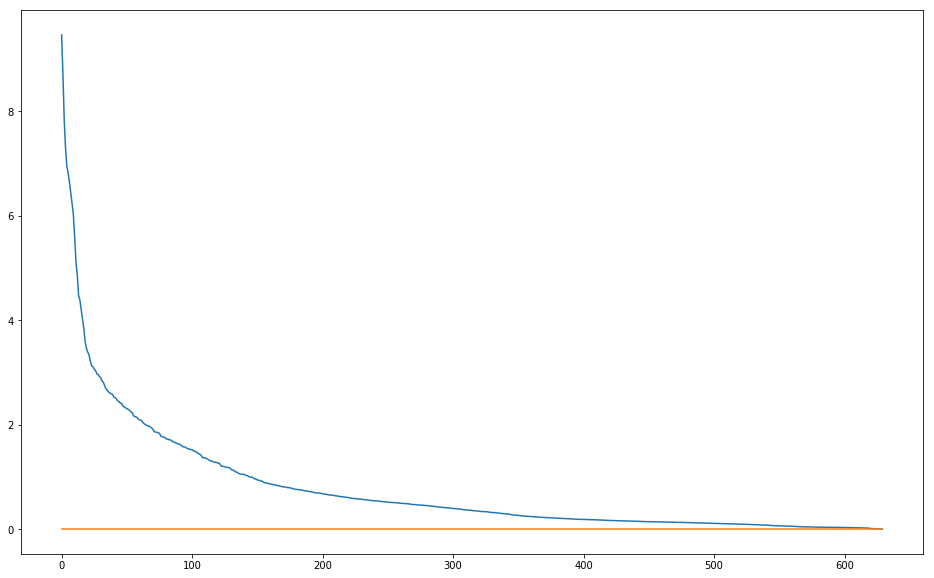

In [59]:
plt.plot(Lamb)
plt.plot(Lamb_filtered)

In [27]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
def get_filtered_gamma_B_lamb_P_and_lamb(A, B, half_B, other_half_B, std_half_B, total_phis, num_decoys, noise_iterations=10, relative_error_threshold=0.5):
    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

    cutoff_modes = []
    for i_noise in range(noise_iterations):
        noisy_B = np.zeros((total_phis, total_phis))
        for i in range(total_phis):
            for j in range(i, total_phis):
                random_B_ij = np.random.normal(
                    loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
                noisy_B[i][j] = noisy_B[j][i] = random_B_ij - \
                    other_half_B[i][j]

        noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
        noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
            noisy_lamb, noisy_P)

        try:
            cutoff_mode = np.where(
                np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
        except IndexError:
            cutoff_mode = len(lamb)
        cutoff_modes.append(cutoff_mode)

    cutoff_mode = min(cutoff_modes)
    print(cutoff_mode)

    filtered_lamb = np.copy(lamb)
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
        filtered_lamb, cutoff_mode, P)

    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)
    return filtered_gamma, filtered_B, filtered_lamb, P, lamb
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors




In [61]:
total_phis = 630
num_decoys = 1000
noise_iterations=10
relative_error_threshold=0.5


lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

cutoff_modes = []
for i_noise in range(noise_iterations):
    noisy_B = np.zeros((total_phis, total_phis))
    for i in range(total_phis):
        for j in range(i, total_phis):
#             random_B_ij = np.random.normal(
#                 loc=half_B[i][j], scale=std_half_B[i][j] / float(num_decoys))
            random_B_ij = np.random.normal(
                loc=half_B[i][j], scale=std_half_B[i][j])
            noisy_B[i][j] = noisy_B[j][i] = random_B_ij - other_half_B[i][j]

    noisy_lamb, noisy_P = np.linalg.eig(noisy_B)
    noisy_lamb, noisy_P = sort_eigenvalues_and_eigenvectors(
        noisy_lamb, noisy_P)

    try:
        cutoff_mode = np.where(
            np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)[0][0]
    except IndexError:
        cutoff_mode = len(lamb)
    cutoff_modes.append(cutoff_mode)

cutoff_mode = min(cutoff_modes)
print(cutoff_mode)

filtered_lamb = np.copy(lamb)
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(
    filtered_lamb, cutoff_mode, P)

filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
# return filtered_gamma, filtered_B, filtered_lamb, P, lamb

0


In [78]:
x = np.zeros(10000)
for i in range(10):
    x1 = np.random.normal(10, scale=10, size=10000)
    x += x1
x = x/10

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   3.,   1.,   2.,   5.,   9.,   9.,   8.,   9.,
         18.,  15.,  16.,  19.,  20.,  40.,  25.,  35.,  45.,  59.,  92.,
         82.,  82., 106.,  98., 135., 144., 172., 174., 215., 219., 226.,
        222., 272., 280., 297., 290., 322., 318., 322., 329., 302., 312.,
        323., 316., 294., 280., 310., 297., 264., 262., 235., 220., 232.,
        199., 163., 159., 152., 135., 127.,  96.,  87.,  79.,  67.,  66.,
         55.,  41.,  34.,  29.,  23.,  16.,  21.,  15.,  20.,   2.,   8.,
          7.,   5.,   1.,   4.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          2.]),
 array([-3.95227878, -3.69337766, -3.43447654, -3.17557543, -2.91667431,
        -2.65777319, -2.39887208, -2.13997096, -1.88106984, -1.62216873,
        -1.36326761, -1.10436649, -0.84546538, -0.58656426, -0.32766314,
        -0.06876203,  0.19013909,  0.44904021,  0.70794132,  0.96684244,
         1.22574356,  1.48

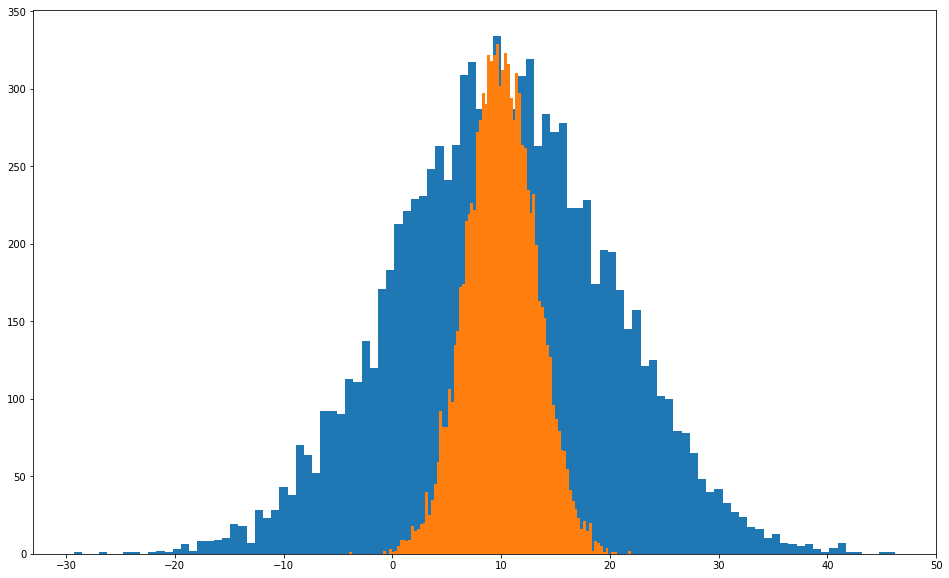

In [82]:
plt.hist(x1, bins=100)
plt.hist(x, bins=100)

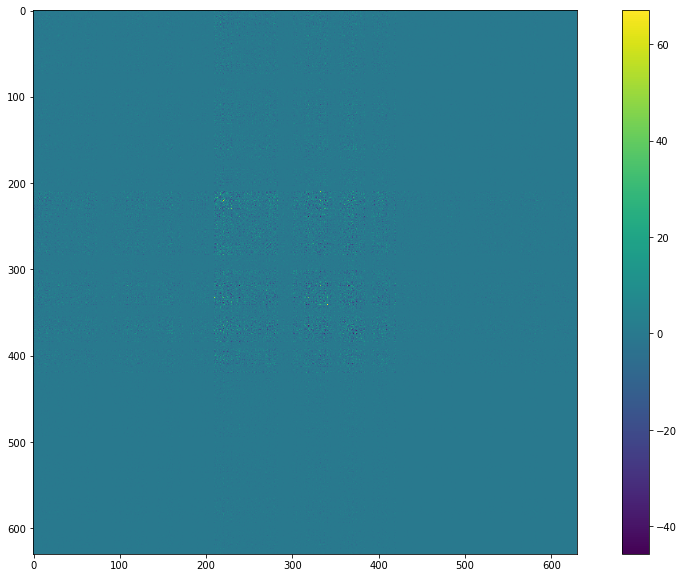

In [70]:
plt.imshow(noisy_B)
plt.colorbar()

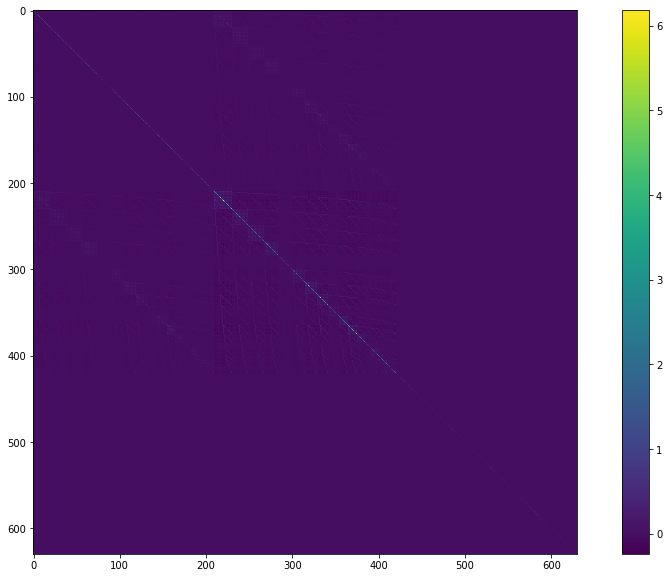

In [71]:
plt.imshow(B)
plt.colorbar()

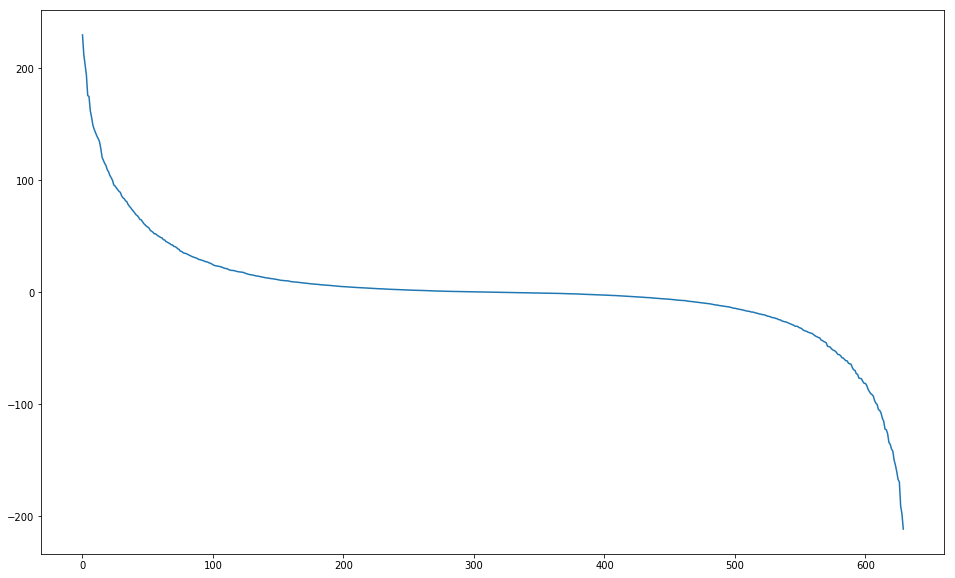

In [67]:
plt.plot(noisy_lamb)

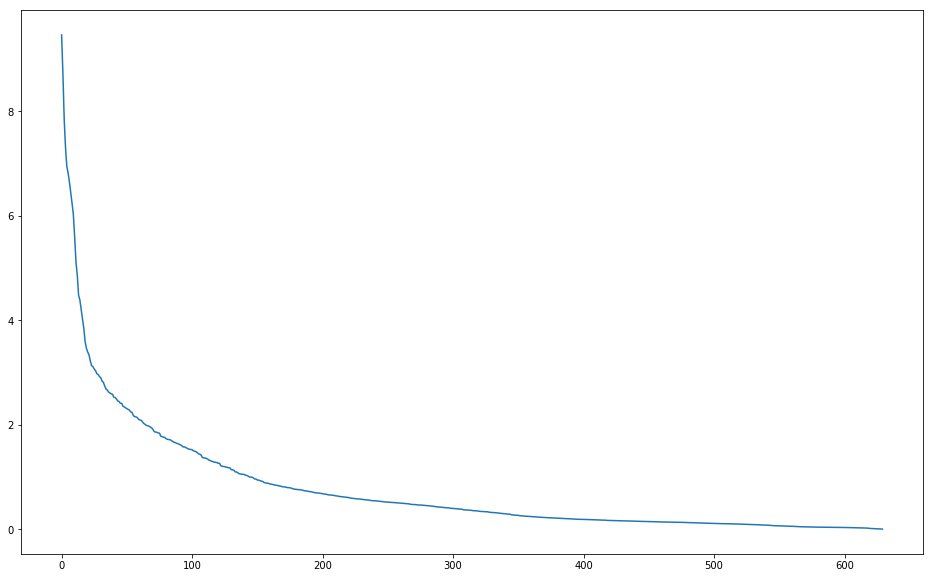

In [68]:
plt.plot(lamb)

In [49]:
np.std([1,2,3])

0.816496580927726

In [52]:
x = np.array([1,2,3])
np.sqrt(np.mean(abs(x - x.mean())**2))

0.816496580927726

In [53]:
np.mean(abs(x - x.mean())**2)

0.6666666666666666

In [ ]:
np.std()

In [48]:
np.abs(lamb - noisy_lamb) / lamb

array([4.42362404e-03, 1.93893429e-03, 2.64110767e-03, 1.42428813e-03,
       1.50997454e-03, 2.87469480e-03, 2.46747095e-03, 6.72837058e-04,
       4.61360827e-03, 4.42200233e-04, 1.75412824e-04, 3.93785708e-05,
       1.31943593e-04, 7.79426405e-04, 1.51753926e-02, 9.32879407e-04,
       1.52171863e-02, 3.85908448e-03, 1.80824521e-03, 7.61036944e-03,
       1.50037002e-03, 5.59814416e-03, 5.66798828e-04, 5.91414606e-03,
       1.44194857e-03, 2.68685516e-04, 7.05757823e-03, 2.02485028e-03,
       2.78607884e-03, 5.84702011e-03, 8.21529995e-03, 2.75890912e-03,
       1.60692462e-03, 2.86493136e-03, 3.02323239e-03, 6.98463693e-03,
       4.19093134e-03, 7.71313831e-03, 5.09829324e-04, 4.21634388e-03,
       8.68223284e-03, 5.27529835e-03, 6.44646008e-03, 7.12112177e-03,
       6.70522986e-03, 7.12967458e-04, 2.57357373e-03, 5.14090074e-03,
       5.35104515e-03, 7.94396756e-03, 2.15530435e-03, 3.12668421e-03,
       4.02619438e-04, 3.29334879e-03, 3.70430819e-03, 6.91930688e-03,
      

In [47]:
np.where(np.abs(lamb - noisy_lamb) / lamb > relative_error_threshold)

(array([], dtype=int64),)

In [37]:
np.sum(filtered_B-B_filtered)

(1.0000000248911933e-05+0j)

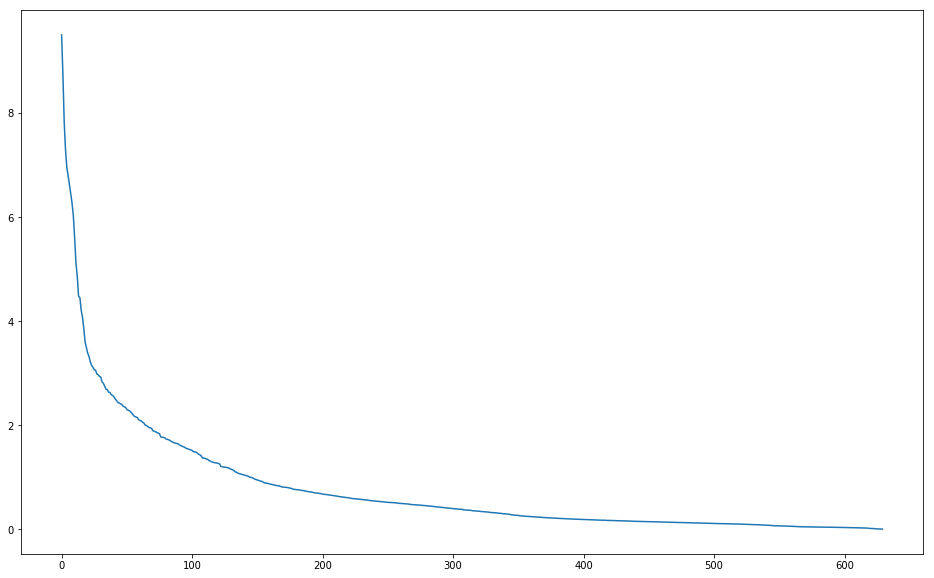

In [45]:
plt.plot(noisy_lamb)

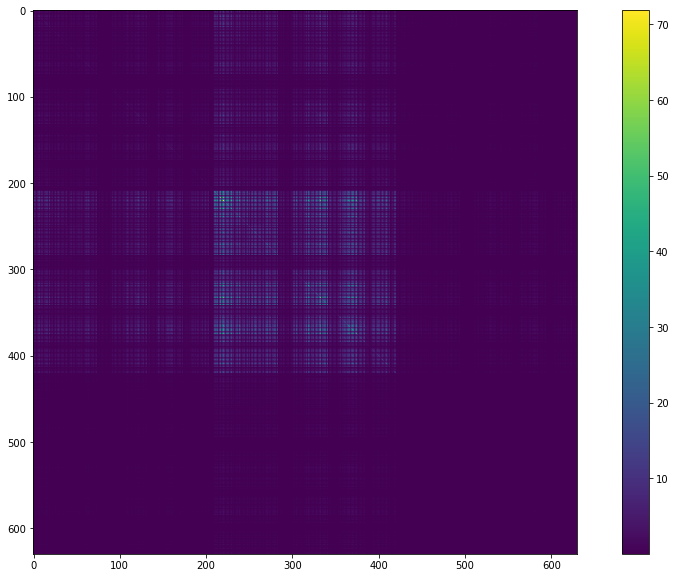

In [43]:
plt.imshow(half_B)
plt.colorbar()

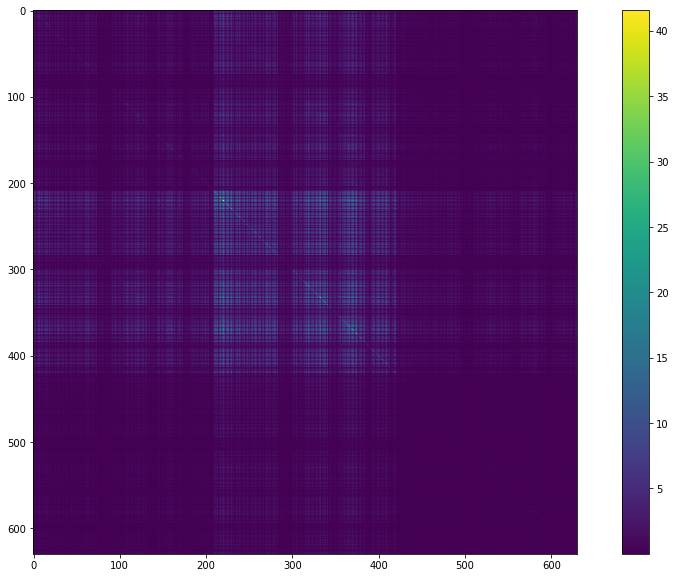

In [42]:
plt.imshow(std_half_B)
plt.colorbar()

In [22]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)

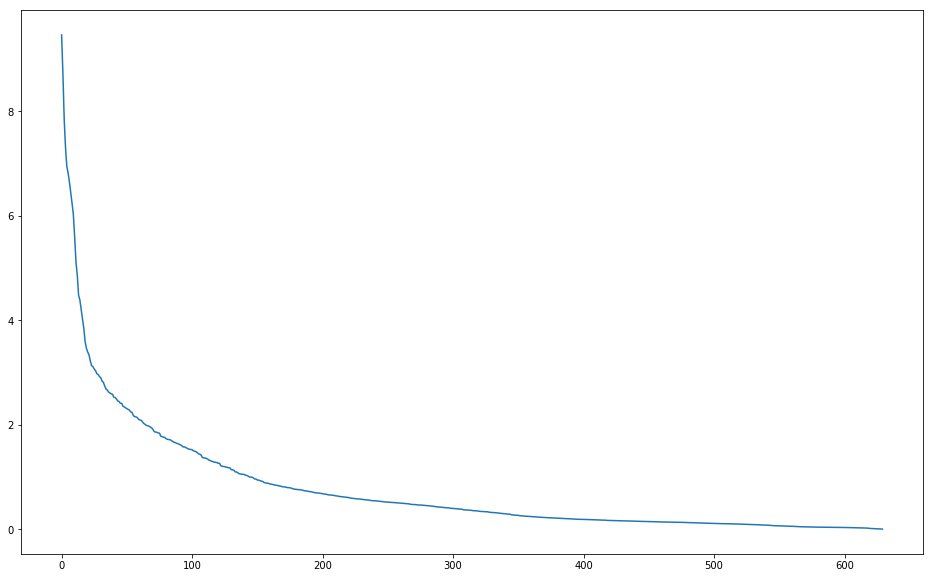

In [28]:
plt.plot(lamb)

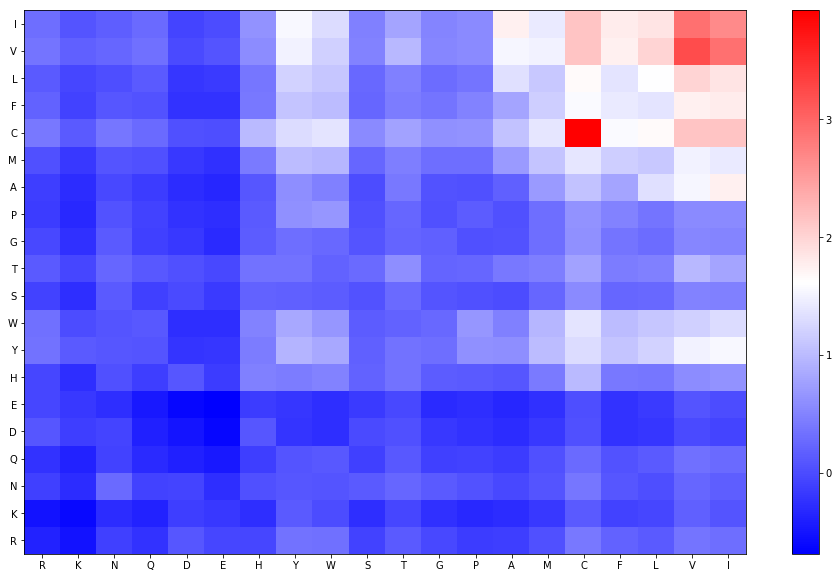

In [54]:
plot_contact_well(Gamma[:210], inferBound=True)

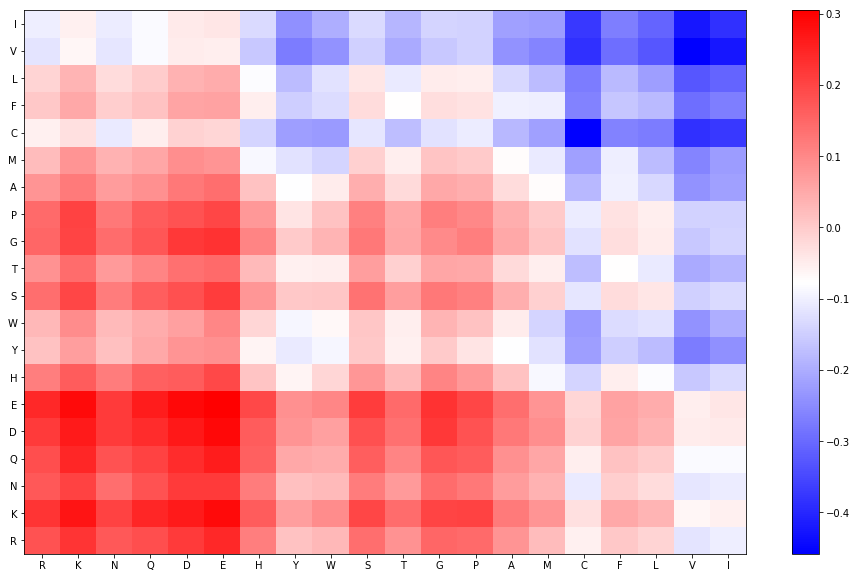

In [55]:
plot_contact_well(Gamma[210:420], inferBound=True)

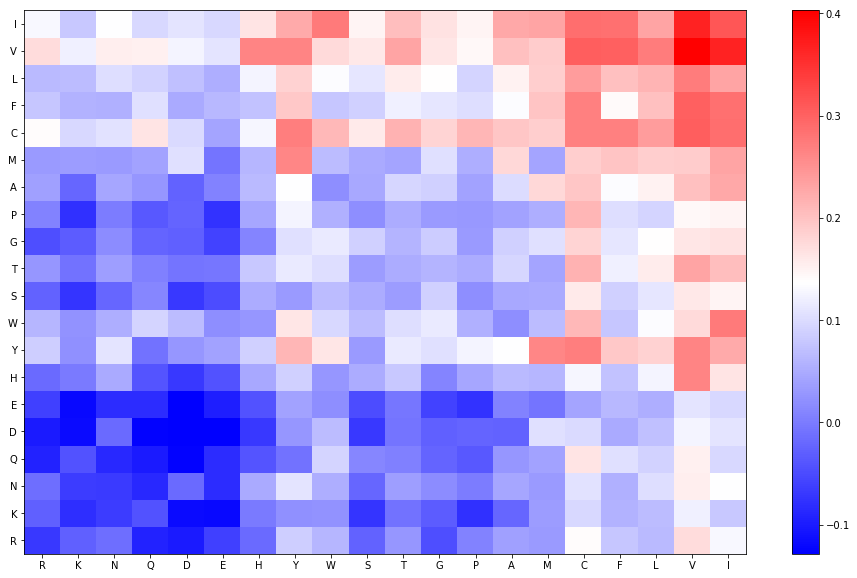

In [56]:
plot_contact_well(Gamma[420:], inferBound=True)

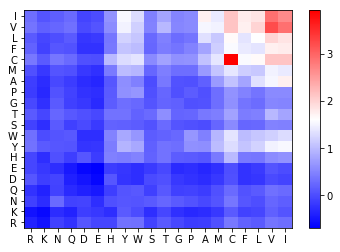

In [5]:
plot_contact_well(Gamma_filtered[:210], inferBound=True)

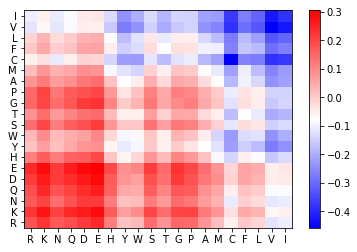

In [6]:
plot_contact_well(Gamma[210:420], inferBound=True)

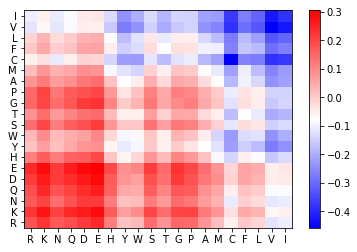

In [7]:
plot_contact_well(Gamma_filtered[210:420], inferBound=True)

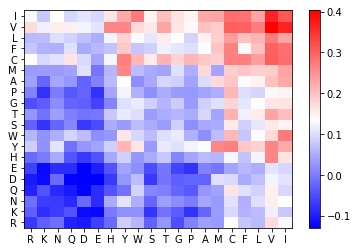

In [8]:
plot_contact_well(Gamma[420:], inferBound=True)

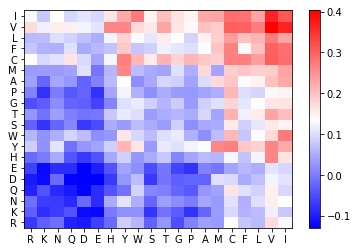

In [9]:
plot_contact_well(Gamma_filtered[420:], inferBound=True)

In [10]:
np.sum(Gamma - Gamma_filtered)

0j

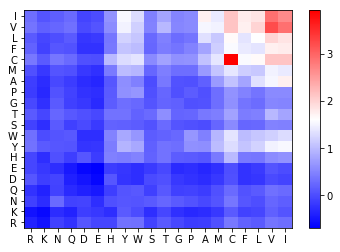

In [17]:
plot_contact_well(Gamma[:210], inferBound=True)

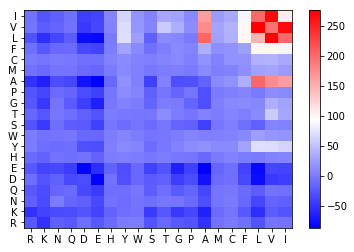

In [18]:
plot_contact_well(Gamma_filtered[:210], inferBound=True)

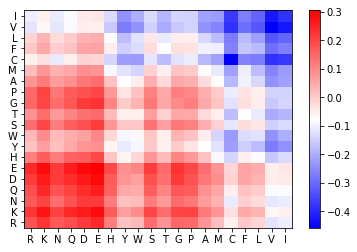

In [19]:
plot_contact_well(Gamma[210:420], inferBound=True)

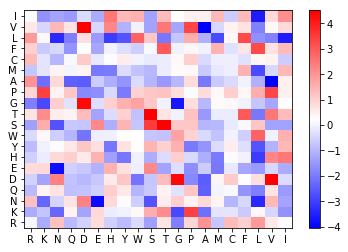

In [20]:
plot_contact_well(Gamma_filtered[210:420], inferBound=True)

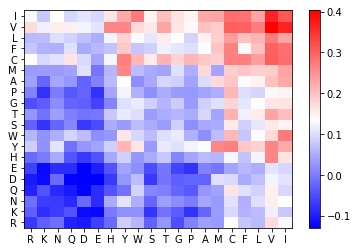

In [16]:
plot_contact_well(Gamma[420:], inferBound=True)

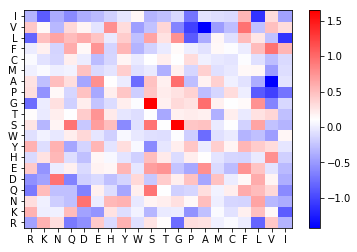

In [15]:
plot_contact_well(Gamma_filtered[420:], inferBound=True)